In [20]:
# Import semua library yang akan digunakan
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [3]:
# Membuat dataframe untuk jumlah umkm
umkm = pd.read_csv('data-umkm-provinsi-kaltim-tahun-2016-2020.csv')
umkm.head(5)

,UMKM,jumlah_mikro,jumlah_kecil,jumlah_menengah,total_umkm,penyerapan_tenaga_kerja
0,2016,270469,181840,788,453097,1064107
1,2017,270469,181840,788,453097,1064107
2,2018,170569,133497,10179,314245,1080072
3,2019,297207,9440,696,307343,1080181
4,2020,271101,8110,510,279721,106121


In [4]:
# Melihat nilai korelasi antar variabel
umkm.corr()

,UMKM,jumlah_mikro,jumlah_kecil,jumlah_menengah,total_umkm,penyerapan_tenaga_kerja
UMKM,1.000000,0.090173,-0.931907,-0.024149,-0.920390,-0.695241
jumlah_mikro,0.090173,1.000000,-0.323972,-0.972012,0.193844,-0.179145
jumlah_kecil,-0.931907,-0.323972,1.000000,0.215034,0.865269,0.589306
jumlah_menengah,-0.024149,-0.972012,0.215034,1.000000,-0.289766,0.284392
total_umkm,-0.920390,0.193844,0.865269,-0.289766,1.000000,0.524647
penyerapan_tenaga_kerja,-0.695241,-0.179145,0.589306,0.284392,0.524647,1.000000


In [5]:
# Membuat dataframe untuk pertumbuhan ekonomi dan inflasi
ekonomi = {
    'pertumbuhan_ekonomi' : [-0.38, 3.13, 2.67, 4.77, -2.85],
    'inflasi' : [3.39, 3.15, 3.24, 1.66, 0.78]
}
pertumbuhan_ekonomi = pd.DataFrame(ekonomi)
pertumbuhan_ekonomi.head()

,pertumbuhan_ekonomi,inflasi
0,-0.38,3.39
1,3.13,3.15
2,2.67,3.24
3,4.77,1.66
4,-2.85,0.78


In [6]:
# Melihat nilai korelasi antar variabel
pertumbuhan_ekonomi.corr()

,pertumbuhan_ekonomi,inflasi
pertumbuhan_ekonomi,1.000000,0.351048
inflasi,0.351048,1.000000


In [8]:
# Menyatukan semua dataframe
df = pd.concat([umkm, pertumbuhan_ekonomi], axis=1)
df.drop(['jumlah_mikro', 'jumlah_kecil', 'jumlah_menengah'], axis=1, inplace=True)
df.head()

,UMKM,total_umkm,penyerapan_tenaga_kerja,pertumbuhan_ekonomi,inflasi
0,2016,453097,1064107,-0.38,3.39
1,2017,453097,1064107,3.13,3.15
2,2018,314245,1080072,2.67,3.24
3,2019,307343,1080181,4.77,1.66
4,2020,279721,106121,-2.85,0.78


In [9]:
# Melihat nilai korelasi antar variabel
df.corr()

,UMKM,total_umkm,penyerapan_tenaga_kerja,pertumbuhan_ekonomi,inflasi
UMKM,1.000000,-0.920390,-0.695241,-0.171165,-0.912227
total_umkm,-0.920390,1.000000,0.524647,0.097374,0.742479
penyerapan_tenaga_kerja,-0.695241,0.524647,1.000000,0.798858,0.793098
pertumbuhan_ekonomi,-0.171165,0.097374,0.798858,1.000000,0.351048
inflasi,-0.912227,0.742479,0.793098,0.351048,1.000000


In [10]:

# Memisahkan independent variable (X) dan dependent variable (y)
X = df[['total_umkm', 'penyerapan_tenaga_kerja', 'inflasi']]
y = df['pertumbuhan_ekonomi']

In [11]:
# Membuat model
model = LinearRegression()

In [12]:
# Memasukkan data (label & atribut) ke model
model.fit(X, y)

LinearRegression()

In [14]:
# mengambil nilai b, w1, w3, dan w3
bias = model.intercept_
weights = model.coef_

bias = format(bias, '3f')
weights = [format(weight, '3f') for weight in weights]

In [17]:
# Menulis formmula regresi linear dari data di atas
form = f'y = {bias} + ({weights[0]})X1 + ({weights[1]})X2 + ({weights[2]})X3'

In [18]:
print(form)

y = -0.937073 + (-0.000006)X1 + (0.000010)X2 + (-1.610369)X3


In [19]:
# X1 -> total umkm
# X2 -> penyerapan tenaga kerja
# X3 -> inflasi

# Visualisasi Data

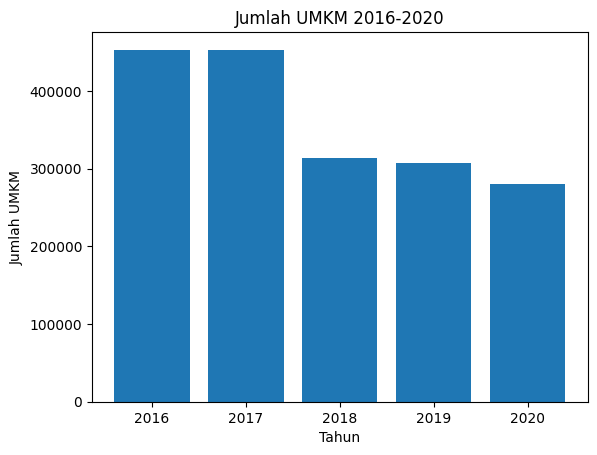

In [22]:
# Memvisualisasikan data jumlah UMKM dari tahun ke tahun
plt.bar(umkm['UMKM'], umkm['total_umkm'])
plt.xlabel('Tahun')
plt.ylabel('Jumlah UMKM')
plt.title('Jumlah UMKM 2016-2020')
plt.show()

# KESIMPULAN

Kesimpulan yang dapat diambil adalah :
- Sebagian besar UMKM adalah skala menengah
- Total UMKM per tahunnya semakin berkurang
- Pertumbuhan ekonomi dan inflasi memiliki korelasi positif yang tidak terlalu kuat
- Penyerapan tenaga kerja oleh UMKM memiliki korelasi positif yang cukup kuat dengan pertumbuhan ekonomi
- Pada formula regresi linear yang diperoleh, diperoleh yang paling berdampak ke pertumbuhan ekonomi adalah jumlah pekerja yang diserap oleh setiap UMKM